In [ ]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

#import some necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Importing the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [ ]:
df = pd.read_csv ('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
#-deleted unnecessary columns
df.drop(columns =['id'], inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#-deleted duplicate rows
df.duplicated().sum()

0

In [ ]:
#-identified and addressed missing values 
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#dropping missing values
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)
df['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [ ]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [ ]:
df['work_type'].value_counts()
#there are no inconsistencies in this data

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

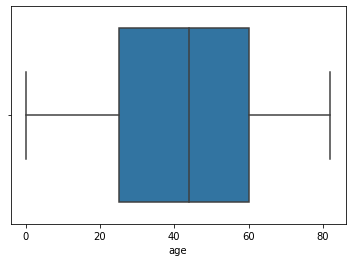

In [ ]:
#-produced univariate visuals for the target and all features
sns.boxplot(data = df, x = 'age');

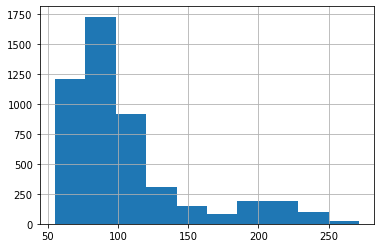

In [ ]:
df['avg_glucose_level'].hist()

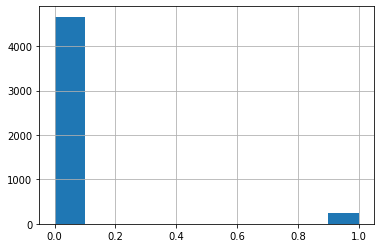

In [ ]:
df['heart_disease'].hist()
#Majority of people in the dataset did not have a stroke

In [ ]:
#-identified outliers
#there are no outliers

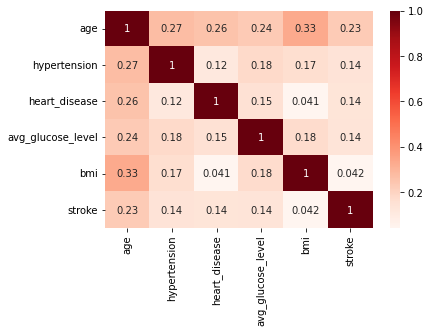

In [ ]:
#-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another
import seaborn as sns
import matplotlib as plt
corr = df.corr()
sns.heatmap(corr,cmap='Reds', annot=True)
#There seems to be a correlation between stroke and the person's bmi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix

In [ ]:
#Prepare the data appropriately for modeling 

In [ ]:
X = df.drop(columns = 'stroke')
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
cat_feat = make_column_selector(dtype_include = 'object')

quant_feat = make_column_selector(dtype_include = 'number')


encoder = OneHotEncoder(handle_unknown = 'ignore')


scaler = StandardScaler()


column_transformer = make_column_transformer((encoder, cat_feat), (scaler, quant_feat))


In [ ]:
column_transformer

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d82d0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d8190>)])

In [ ]:
df['stroke'].value_counts(normalize = True)


0    0.957425
1    0.042575
Name: stroke, dtype: float64

In [ ]:
#Model 1:Decision Tree
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth= 2)

In [ ]:
dec_tree

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
dec_pipe = make_pipeline(column_transformer, dec_tree)

In [ ]:
dec_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d82d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d8190>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [ ]:
dec_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)


0.9603368649823417
0.9486970684039088


In [ ]:
y_pred = dec_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9486970684039088


In [ ]:
def evaluate_classification(y_true, y_pred, average=None):
  accuracy = accuracy_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred, average=average)
  precision = precision_score(y_true, y_pred, average=average)
  f1 = f1_score(y_true, y_pred, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [ ]:
evaluate_classification(y_test, y_pred)

Accuracy: 0.9486970684039088 
Recall: [1. 0.] 
Precision: [0.94869707 0.        ] 
F1 Score: [0.97367321 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confuse = confusion_matrix(y_test, y_pred)
print(confuse)

[[1165    0]
 [  63    0]]


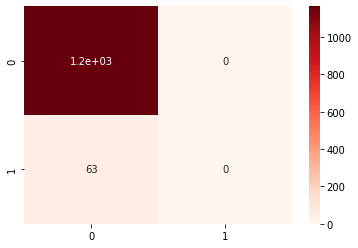

In [ ]:
sns.heatmap(confuse, cmap = 'Reds', annot = True);

In [ ]:
#Model 2: KNeighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_pipe = make_pipeline(column_transformer, knn)

knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d82d0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d8190>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d82d0>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d8190>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'column

In [ ]:

knn_params = {'kneighborsclassifier__n_neighbors' : [2, 1],
              'kneighborsclassifier__leaf_size' : [1, 2]}
              

In [ ]:
knn_gs = GridSearchCV(knn_pipe, knn_params)

knn_gs.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d82d0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fa4e03d8190>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__leaf_size': [1, 2],
                     

In [ ]:
y_pred2 = knn_gs.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)


0.9478827361563518


In [ ]:
def evaluate_classification(y_true, y_pred2, average=None):
  accuracy = accuracy_score(y_true, y_pred2)
  recall = recall_score(y_true, y_pred2, average=average)
  precision = precision_score(y_true, y_pred2, average=average)
  f1 = f1_score(y_true, y_pred2, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [ ]:
evaluate_classification(y_test, y_pred)

Accuracy: 0.9486970684039088 
Recall: [1. 0.] 
Precision: [0.94869707 0.        ] 
F1 Score: [0.97367321 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confuse = confusion_matrix(y_test, y_pred)
print(confuse)

[[1165    0]
 [  63    0]]


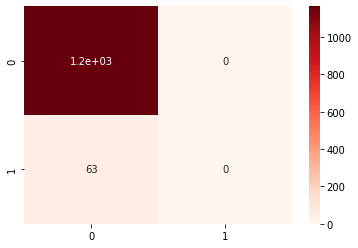

In [ ]:
sns.heatmap(confuse, cmap = 'Reds', annot = True);

In [ ]:
#Model 3: ROC Curve
logreg = LogisticRegression(C = .001)

scaler = StandardScaler(with_mean=False)

logreg_pipe = make_pipeline(encoder, scaler, logreg)





In [ ]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(C=0.001))])

In [ ]:

print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')


Training AUC: 0.9999283098564259
Testing AUC: 0.8035561005518086


In [ ]:
#Model 3: ROC Curve
logreg1 = LogisticRegression(C = .500)

scaler = StandardScaler(with_mean=False)

logreg_pipe1 = make_pipeline(encoder, scaler, logreg)





In [ ]:
logreg_pipe1.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression(C=0.001))])

In [ ]:

print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')


Training AUC: 0.9999283098564259
Testing AUC: 0.8035561005518086


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
transform_train = column_transformer.transform(X_train)

In [ ]:
transform_test = column_transformer.transform(X_test)

[Text(0.5, 0.8333333333333334, 'X[16] <= 1.058\ngini = 0.076\nsamples = 3681\nvalue = [3535, 146]'),
 Text(0.25, 0.5, 'X[16] <= 0.08\ngini = 0.037\nsamples = 3065\nvalue = [3008, 57]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.006\nsamples = 1859\nvalue = [1853, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.081\nsamples = 1206\nvalue = [1155, 51]'),
 Text(0.75, 0.5, 'X[19] <= 3.016\ngini = 0.247\nsamples = 616\nvalue = [527, 89]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.231\nsamples = 593\nvalue = [514, 79]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.491\nsamples = 23\nvalue = [13, 10]')]

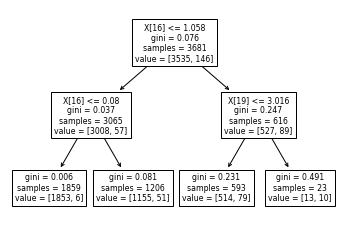

In [ ]:

tree.plot_tree(dec_pipe['decisiontreeclassifier'])

In [ ]:
dec_pipe['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
transform_train = column_transformer.transform(X_train)

In [ ]:
transform_test = column_transformer.transform(X_test)

In [ ]:
#For the production model I will choose the decision tree because the train score got a 100% and that is very efficient compared to the other models. The ROC Curve model was close with the training scores with the Decision Tree model but the Decision Tree model had better Testing scores. The Decison Tree model will preform